In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ploan=pd.read_csv("https://raw.githubusercontent.com/ChaithrikaRao/DataChime/master/Bank_Personal_Loan_Modelling.csv")
ploan.shape

(5000, 14)

1. 독립변수
- Age: 고객의 나이  
- Experience: 고객의 직업 경험 기간  
- Income: 고객의 연간 수입  
- Family: 고객의 가구수  
- CCAvg: 고객의 월평균 신용카드 사용금액  
- Education: 고객의 교육 수준(1:Undergrad, 2:Graduate, 3:Advanced/Professional
- Mortgate: 고객의 주택 담보 가치
- Securities Account: 고객의 증권계좌 보유 여부
- CD Account: 고객의 예금증서 보유 여부
- Online: 고객의 온라인 뱅킹 여부
- CreditCard: 고객의 신용카드 발급 여부

2. 종속변수
- Personal Loan(대출 여부): 1(대출), 0(미대출)

In [3]:
ploan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
ploan_processed=ploan.dropna().drop(["ID","ZIP Code"],axis=1,inplace=False)

In [5]:
X=ploan_processed.drop("Personal Loan",axis=1)
y=ploan_processed["Personal Loan"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.3, random_state=1234)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


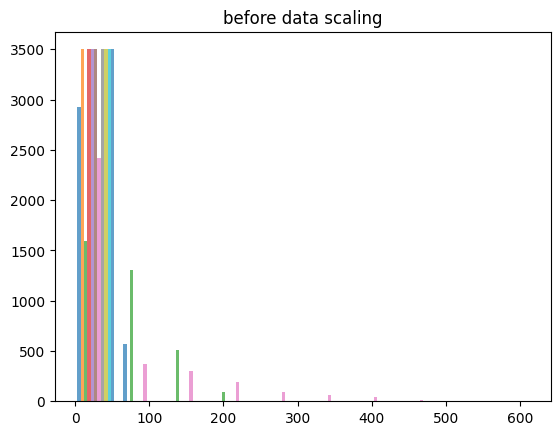

In [11]:
plt.hist(X_train,bins=10,alpha=0.7)
plt.title('before data scaling')
plt.show()   #한쪽으로 치우쳐서 정규화 해야함

In [14]:
from sklearn import preprocessing
preprocessor=preprocessing.Normalizer()  #특성들 간의 상대적 비율을 보존하기 위해(행 단위 처리)

In [15]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

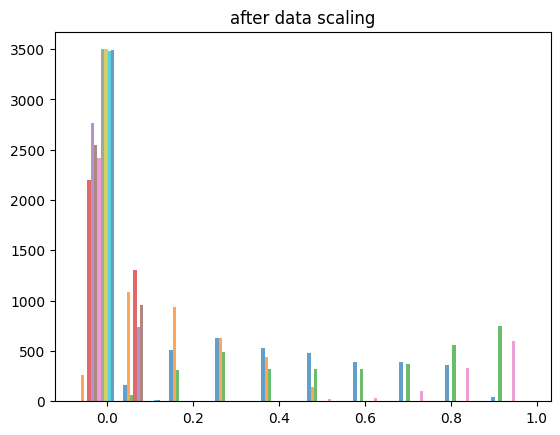

In [16]:
plt.hist(X_train,bins=10,alpha=0.7)
plt.title('after data scaling')  #정규화 후
plt.show()

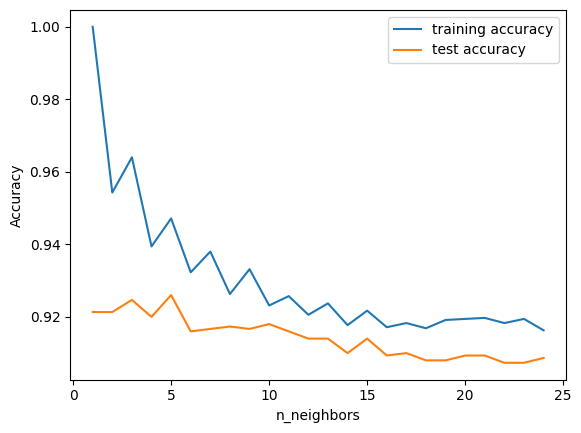

In [17]:
#KNN모델
#그래프보고 k가 몇일 때 가장 좋은지 정하기
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
test_accuracy=[]

#1부터 25까지 n_neighbors를 적용
neighbors_settings=range(1,25)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train)) #훈련세트 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))  #일반화 정확도 저장

plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
#k=5에서 좋았다가 그후 정확도 떨어지므로 최적k은 5임

In [18]:
#위의 그래프에서 한눈에 파악하기 어려울때 수치로 살펴봄
test_accuracy   #k=5에서 0.926으로 가장높음

[0.9213333333333333,
 0.9213333333333333,
 0.9246666666666666,
 0.92,
 0.926,
 0.916,
 0.9166666666666666,
 0.9173333333333333,
 0.9166666666666666,
 0.918,
 0.916,
 0.914,
 0.914,
 0.91,
 0.914,
 0.9093333333333333,
 0.91,
 0.908,
 0.908,
 0.9093333333333333,
 0.9093333333333333,
 0.9073333333333333,
 0.9073333333333333,
 0.9086666666666666]